# Propellant Storage

In [1]:
using PyPlot
using PorousMaterials
PyPlot.matplotlib.style.use("Solarize_Light2")

The temperature is 300 K in the atmosphere.

In [2]:
const T = 300.0 # K

300.0

Universal gas constant

In [3]:
const R = 8.3144598e-5 # m³-bar/(K-mol)

8.3144598e-5

Mass desired of xenon propellant. [Source](https://doi.org/10.2514/6.2000-3677) for typical amount of Xe to bring into space: 89 kg

In [4]:
const m_p = 1000 # mol

1000

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = VdWFluid(::Symbol) at EOS.jl:151
└ @ PorousMaterials /home/simoncor/.julia/dev/PorousMaterials/src/EOS.jl:151
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = VdWFluid(::Symbol) at EOS.jl:154
└ @ PorousMaterials /home/simoncor/.julia/dev/PorousMaterials/src/EOS.jl:154


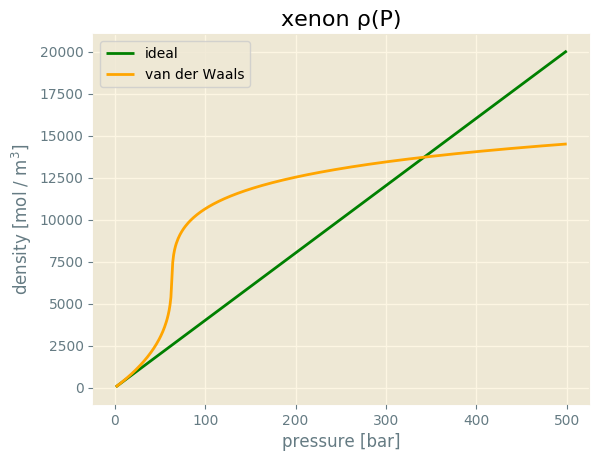

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = VdWFluid(::Symbol) at EOS.jl:155
└ @ PorousMaterials /home/simoncor/.julia/dev/PorousMaterials/src/EOS.jl:155


In [5]:
P = range(0.0, stop=500.0, length=501)[2:end] # bar

# ideal gas density
ρ_ig = P / (R * T) # mol / m³

ρ_vdw = zeros(length(P))
xe = VdWFluid(:Xe)

for (i, p_i) in enumerate(P)
    props = calculate_properties(xe, T, p_i, verbose=false)
    ρ_vdw[i] = props["density (mol/m³)"]
end
    
figure()
plot(P, ρ_ig, color="green", label="ideal")
plot(P, ρ_vdw, color="orange", label="van der Waals")
xlabel("pressure [bar]")
ylabel("density [mol / m\$^3\$]")
legend()
title("xenon ρ(P)")
savefig("Xenon Ideal Gas vs. van der Waals Gas Density.pdf", format="pdf")

For a thin-walled containing a supercritical, pressurized fluid without considering safety factor $\beta$

Assume the tank is made of Kevlar 49 [[Source](http://www.mse.mtu.edu/~drjohn/my4150/props.html)].

In [6]:
const ρ_tank_material = 1470.0 # kg/m³
const σ = 28000.0 # yield strength of Kevlar 49 (bar)

28000.0

Volume of the tank must be equal to the volume of propellant (of course). This allows us to, given a propellant storage density $\rho_p$, compute the radius of the spherical tank needed.

$4/3 \pi  r ^ 3 = m_p / \rho_{vdw}$

In [7]:
r = (m_p * 3 ./ (4 * π * ρ_vdw)) .^ (1 / 3); # inner radius of tank (m)

Minimum wall thickness required to contain the pressure of supercritical fluid. Thickness is found using the free-body diagram of a spherical, thin-walled tank. By taking the force of the fluid over a cross-sectional area ($P \pi  r ^ 2$) set equal to the force of the tank walls over the circumference, including the yield strength and thickness of the wall ($2 \pi  r \sigma  t$). We then isolate $t$ to solve for the thickness.

\begin{equation}
2 \pi  r \sigma  t=P \pi  r ^ 2
\end{equation}

In [8]:
t_tank_wall = P .* r / (2 * σ); # tank wall thickness (m)

The mass of the tank can be found using the surface area of sphere, the thickness of the sphere, and the density of the material.

In [9]:
m_tank = ρ_tank_material * 4 * π .* r .^ 2 .* t_tank_wall; # kg

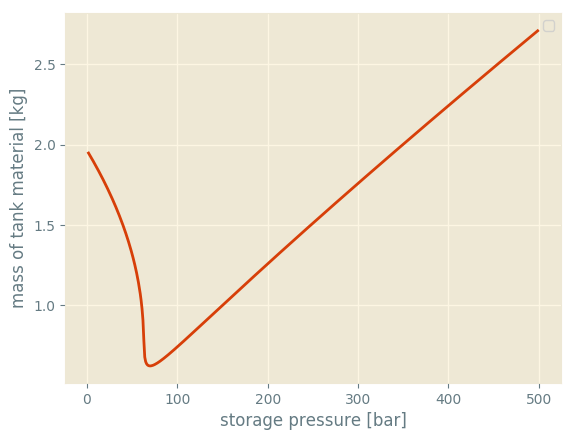

No handles with labels found to put in legend.


In [10]:
figure()
plot(P, m_tank, color=(215/255, 63/255, 9/255))
xlabel("storage pressure [bar]")
ylabel("mass of tank material [kg]")
legend()
# title("Xenon in Kevlar 49")
show()
savefig("Xenon van der Waals Gas in Pure Kevlar 49.pdf", format="pdf")

Sphere is preferred for storage of high pressure fluids. Theoretically, a sphere would be the best shape of a pressure vessel. However, a spherical shape is tough to manufacture, therefore more expensive, so most pressure vessels are cylindrical with 2:1 semi-elliptical heads or end caps on each end. The drawback to cylindrical types is cylinders are not as strong as spheres due to the weak point at each end.

NOTE: this is using PURE Kevlar 49. Titanium is typically used only as an inner lining with carbon fiber overwrapping* -- [Source](https://doi.org/10.2514/6.2000-3677)
Kevlar 49 is used as 80-90% of the structural integrity of the tank while the lining makes direct contact with the compressed fluid. The lining does provide structural support, but very little compared to the overwrap.